In [10]:
%pip install faker

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from faker import Faker
import json

# from google.colab import drive
# drive.mount("/content/drive")

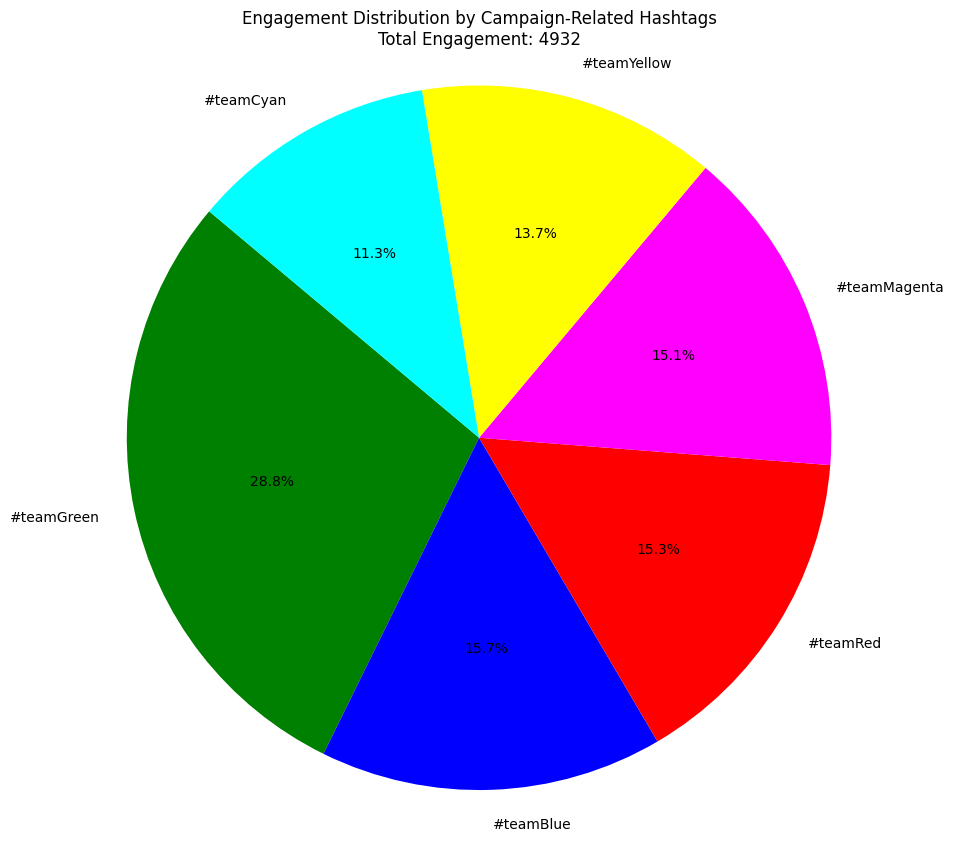

In [12]:
# Group No. 7
# 1. Benjarat Chooduang 6410450516
# 2. Kanyapat Thumthong 6410450346
# 3. Nopparuj Kunsongkhunakon 6410451687
# ---
######
group = 7
problem = 4 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".json"



# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"


# อ่านข้อมูล
data = pd.read_json(data_path, lines=True)

# --- เริ่มเขียนโค้ดตรงนี้ ---

# ทำการเเทนค่า null
data['Hashtag'] = data['Hashtag'].fillna('')

# ทำ list ของ hashtags ที่จะวิเคราะห์
specific_hashtags = ['teamRed', 'teamGreen', 'teamCyan', 'teamBlue', 'teamMagenta', 'teamYellow']

# Function ไว้หา teamที่จะวิเคราะห์ ในเเต่ละ hashtag
def extract_team(hashtags):
    hashtags = str(hashtags)
    for team in specific_hashtags:
        if team in hashtags:
            return team
    return ''

# ใช้ function เพื่อหา teamที่จะวิเคราะห์ ในเเต่ละ hashtag
data['Team'] = data['Hashtag'].apply(extract_team)

# Filter เอา rows ที่ไม่มี team ออก
filtered_data = data[data['Team'] != '']

# คำนวณค่า engagements (shares + likes) ของแต่ทีม
team_engagement = filtered_data.groupby('Team')[['Likes', 'Retweets']].sum().reset_index()
team_engagement['TotalEngagement'] = team_engagement['Likes'] + team_engagement['Retweets']

# สร้าง DataFrame ของแต่ทีม
all_teams = pd.DataFrame({'Team': specific_hashtags})

# เอา 2 DataFrames มาร่วมกันเเละใส่ค่า 0 ให้กับทีมที่ไม่มี
team_engagement = pd.merge(all_teams, team_engagement, on='Team', how='left').fillna(0)

# ทำค่าให้เป็น int
team_engagement['Likes'] = team_engagement['Likes'].astype(int)
team_engagement['Retweets'] = team_engagement['Retweets'].astype(int)
team_engagement['TotalEngagement'] = team_engagement['TotalEngagement'].astype(int)

# เปลี่ยนชื่อ column 'Team' เป็น 'Hashtag'
team_engagement.rename(columns={'Team': 'Hashtag'}, inplace=True)

# เรียง columns
team_engagement = team_engagement [['Hashtag', 'Likes', 'Retweets', 'TotalEngagement']]

# เรียงตาม TotalEngagement จากมากไปน้อย
team_engagement = team_engagement.sort_values(by='TotalEngagement', ascending=False)

# ทำ list สีของเเต่ละ team สำหรับแผนภูมิวงกลม (pie chart)
team_colors = {
    'teamRed': 'red',
    'teamGreen': 'green',
    'teamCyan': 'cyan',
    'teamBlue': 'blue',
    'teamMagenta': 'magenta',
    'teamYellow' : 'yellow'
}
# Filter เอา teams ที่ไม่มี engagement ออก
engaged_teams = team_engagement[team_engagement['TotalEngagement'] > 0]

# สร้างแผนภูมิวงกลม (pie chart) แสดงส่วนแบ่ง engagements ของแต่ละ teams ถ้าทีมใดไม่มี engagements ให้งดแสดงผลในแผนภูมิ
plt.figure(figsize=(10, 10))
plt.pie(engaged_teams['TotalEngagement'], labels="#"+engaged_teams['Hashtag'], autopct='%1.1f%%', startangle=140, colors=[team_colors.get(team, 'gray') for team in engaged_teams['Hashtag']])
plt.title('Engagement Distribution by Campaign-Related Hashtags\nTotal Engagement: {:.0f}'.format(engaged_teams['TotalEngagement'].sum()))

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
team_engagement.to_csv(result_path, index=False)

# แสดงผลลัพธ์
team_engagement.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.axis('equal')
plt.show()